In [14]:
import pandas as pd
from bs4 import BeautifulSoup as BS
import urllib.request as req
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline
# Korean Setting , Minus 표시
mpl.rcParams['axes.unicode_minus'] = False
# family = 폰트 이름 size = 사이즈 크기
mpl.rc('font', family='D2Coding', size=12)
# Graph 크기 변경
plt.rcParams["figure.figsize"]= (15,9)

## 1. 아랫줄에 * 가 7개인 산 모양 2개를 출력하는 프로그램을 For loop을 사용해서 만드시오.
## 단, 산관 산 사이에는 공백이 한개 있음

In [46]:
n = int(input('number : '))

for i in range(1, n+1):

    print(" "*(n-i), "*"*(2*i-1), " "*2*(n-i), "*"*(2*i-1))

number : 7
       *              *
      ***            ***
     *****          *****
    *******        *******
   *********      *********
  ***********    ***********
 *************  *************


## 2. 다음의 지뢰찾기 문제를 해결해보시오
## . 정수n을 매개변수로 하여 크기가 (n,n)인 리스트를 만들고 여기에 *, ,을 랜덤하게 채워 출력하고 리턴하는 함수 create_mine(n)을 만드시오
## . 최종 결과를 보여주는 프로그램을 작성하시오 *는 지뢰 .은 지뢰 아님 지뢰가 아닌 요소에는 인접한 지뢰의 갯수를 출력해야함

In [3]:
def create_mine(n):
    if n < 3:
        print('3이상으로 입력해주세요.')
    else:
        mine_pool = '.*'
        mine_field= np.random.randint(0, 2, size=(n, n))
        
        mine_field= mine_field.tolist()
        
    for i in range(n):
        for j in range(n):
            if mine_field[i][j] == 0:
                mine_field[i][j] = '.'
            else:
                mine_field[i][j] = '*'
        
    return mine_field

In [4]:
n = int(input('n을 입력하세요(n >= 3) : '))
create = create_mine(n)
for x in range(n):
    for y in range(n):
        if create[x][y] == '*':
            print(create[x][y], sep='', end= '')
        else:
            count = 0
            for xo in range(-1,2):
                for yo in range(-1,2):
                    if 0 <= x + xo < n and 0 <= y + yo < n and create[x+xo][y+yo] == '*':
                            count += 1
            print(count, sep='', end='')
    print()

n을 입력하세요(n >= 3) : 5
013**
12**3
*5553
*****
3*432


## 3. 하이퍼볼릭 탄젠트 함수의 그래프를 -2*pi에서 2*pi까지 matpltlib 함수를 사용하여 그리시오

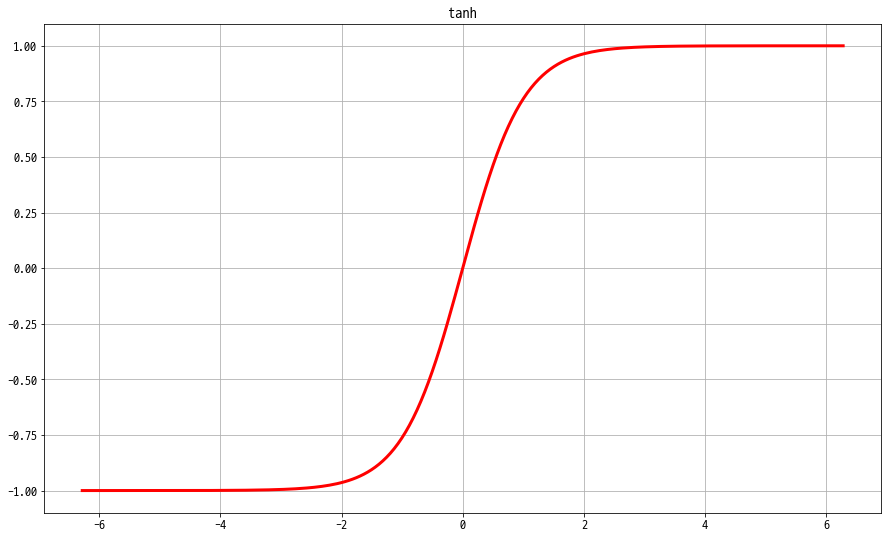

In [5]:
x_data = np.linspace(-2 * np.pi, 2* np.pi, 201)

plt.title('tanh')
plt.plot(x_data, np.tanh(x_data), 'r',linewidth = 3)

plt.grid(True)
plt.show()

## 4. 멜론 사이트 top100 크롤링하여 제목 가수 앨범명 전월순위 피드를 가지는 데이터 프레임을 만들고 1위에서 10위까지를 출력하는 프로그램을 작성하시오

In [6]:
def Append_Field(Field):
    for item in Field:
        rank = item.find(class_='rank').get_text()
        song = item.find_all(class_='wrap_song_info')[0].find(class_='ellipsis rank01').find('a').get_text()
        singer = item.find_all(class_='wrap_song_info')[0].find(class_='ellipsis rank02').find('a').get_text()
        album = item.find_all(class_='wrap_song_info')[1].find(class_='ellipsis rank03').get_text().strip()
        
        month_rank_1= item.find_all(class_='rank_wrap')[0].find_all(class_='none')[0].get_text()
        new_rank = -1
        
            
        Rank.append(rank)
        
        if month_rank_1  == '순위 동일':
                month_rank_0 = item.find_all(class_='rank_wrap')[0].find_all(class_='none')[1].get_text()
                Month_Rank.append(rank)
        elif month_rank_1 == '단계 상승':
                month_rank_up = item.find_all(class_='rank_wrap')[0].find(class_='up').get_text()
                Month_Rank.append(int(rank) + int(month_rank_up))
        elif month_rank_1 == '단계 하락':
                 month_rank_down = item.find_all(class_='rank_wrap')[0].find(class_='down').get_text()
                 Month_Rank.append(int(rank) - int(month_rank_down))
        elif month_rank_1 == '순위 진입':
                Month_Rank.append(new_rank)
                
        Song.append(song)
        Singer.append(singer)
        Album.append(album)

In [7]:
# 1위 ~ 50위
html = req.Request('https://www.melon.com/chart/index.htm',
   headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'})
page = req.urlopen(html)
soup = BS(page, 'html.parser')

In [8]:
Field = soup.find_all(class_='lst50')

In [9]:
# 순위
Field[0].find(class_='rank').get_text()

'1'

In [10]:
# 곡이름
Field[0].find_all(class_='wrap_song_info')[0].find(class_='ellipsis rank01').find('a').get_text()

'에잇(Prod.&Feat. SUGA of BTS)'

In [11]:
# 가수
Field[0].find_all(class_='wrap_song_info')[0].find(class_='ellipsis rank02').find('a').get_text()

'아이유'

In [12]:
# 앨범명
Field[0].find_all(class_='wrap_song_info')[1].find(class_='ellipsis rank03').get_text().strip()

'에잇'

In [13]:
Field[0].find_all(class_='rank_wrap')[0].find_all(class_='none')[0].get_text()

'순위 동일'

In [14]:
Field[10].find_all(class_='rank_wrap')[0].find_all(class_='up')[0].get_text()

'1'

In [15]:
Field[26].find(class_='rank_wrap').find(class_='down').get_text()

'6'

In [16]:
Rank = []
Month_Rank = []
Song = []
Singer = []
Album = []

In [17]:
Append_Field(Field)

In [18]:
Field_100 = soup.find_all(class_='lst100')

In [19]:
Append_Field(Field_100)

In [20]:
df = pd.DataFrame(dict(zip(['순위', '제목', '가수', '앨범명', '전월 순위'], [Rank, Song, Singer, Album, Month_Rank])))

In [21]:
df = df.set_index('순위')

In [22]:
df

,제목,가수,앨범명,전월 순위
순위,,,,
1,에잇(Prod.&Feat. SUGA of BTS),아이유,에잇,1
2,사랑하게 될 줄 알았어,전미도,슬기로운 의사생활 OST Part 11,2
3,아로하,조정석,슬기로운 의사생활 OST Part 3,3
4,MORE & MORE,TWICE (트와이스),MORE & MORE,4
5,깡 Official Remix,식케이 (Sik-K),깡 Official Remix,5
...,...,...,...,...
96,Paris In The Rain,Lauv,I met you when I was 18. (the playlist),-1
97,HIP,마마무 (Mamamoo),reality in BLACK,98
98,고맙소,김호중,내일은 미스터트롯 결승전 베스트,94


In [23]:
df[0:10]

,제목,가수,앨범명,전월 순위
순위,,,,
1,에잇(Prod.&Feat. SUGA of BTS),아이유,에잇,1
2,사랑하게 될 줄 알았어,전미도,슬기로운 의사생활 OST Part 11,2
3,아로하,조정석,슬기로운 의사생활 OST Part 3,3
4,MORE & MORE,TWICE (트와이스),MORE & MORE,4
5,깡 Official Remix,식케이 (Sik-K),깡 Official Remix,5
6,살짝 설렜어 (Nonstop),오마이걸,NONSTOP,6
7,ON,방탄소년단,MAP OF THE SOUL : 7,7
8,Candy,백현 (BAEKHYUN),Delight - The 2nd Mini Album,8
9,나비와 고양이 (feat.백현 (BAEKHYUN)),볼빨간사춘기,사춘기집Ⅱ 꽃 본 나비,9


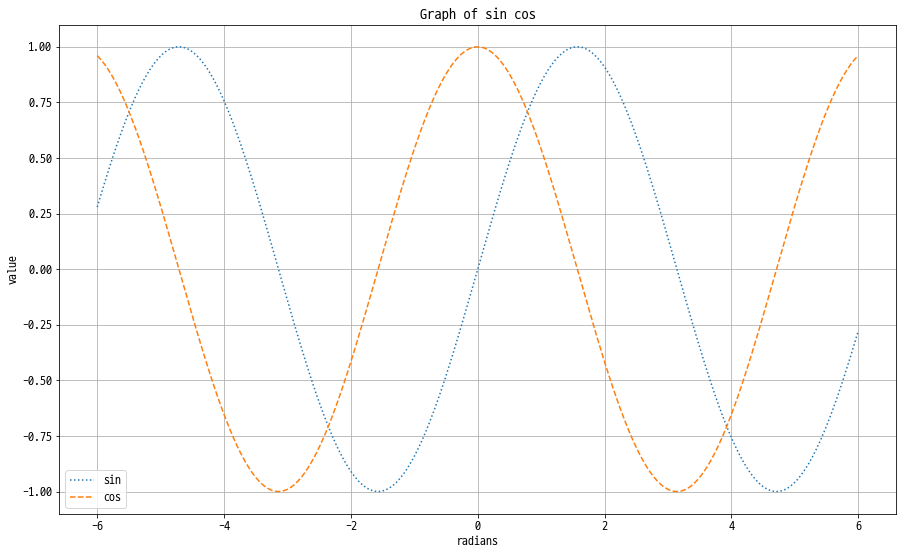

In [13]:
linestyles = ['-', '--', '-.', ':']
sin = np.sin(x)
cos = np.cos(x)
plt.plot(x, sin, ls=linestyles[3], label='sin')
plt.plot(x, cos, ls=linestyles[1], label='cos')

plt.title("Graph of sin cos")

plt.xlabel('radians')

plt.ylabel('value')

plt.grid()

plt.legend()

plt.show()

In [77]:
m = np.arange(10,1, -1)
y = np.arange(1,10)
v = 10
g = 9.8

In [78]:
x1 = 1/2*m*v
x1

array([50., 45., 40., 35., 30., 25., 20., 15., 10.])

In [79]:
x2 =  m * g * y
x2

array([ 98. , 176.4, 235.2, 274.4, 294. , 294. , 274.4, 235.2, 176.4])

In [80]:
x3 = x1 + x2
x3

array([148. , 221.4, 275.2, 309.4, 324. , 319. , 294.4, 250.2, 186.4])

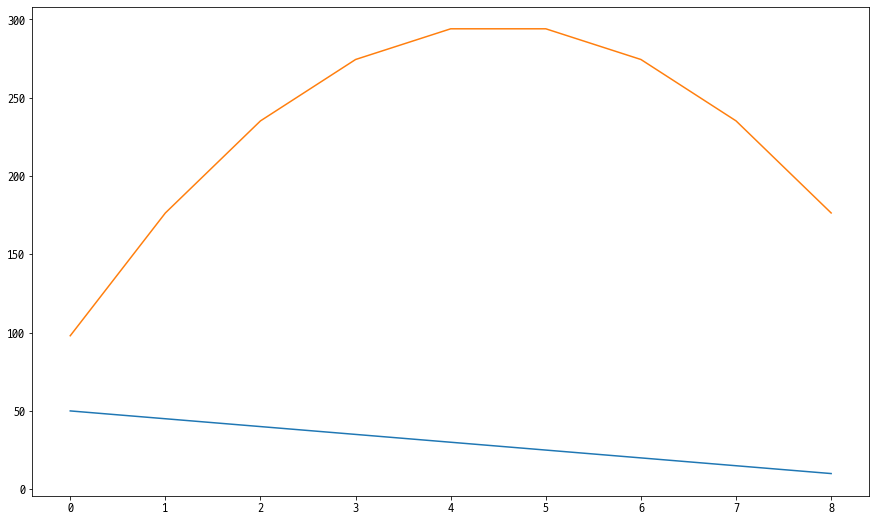

In [81]:
plt.plot(x1)
plt.plot(x2)